In [1]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("/content/medicine_quality_preprocessed.csv")

In [4]:
df.shape

(847, 18)

In [5]:
df.head()

,Days Until Expiry,Storage Temperature,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Warning Labels Present,Active Ingredient_Aspirin,Active Ingredient_Atorvastatin,Active Ingredient_Cetirizine,Active Ingredient_Ciprofloxacin,Active Ingredient_Ibuprofen,Active Ingredient_Lisinopril,Active Ingredient_Metformin,Active Ingredient_Omeprazole,Active Ingredient_Paracetamol,Active Ingredient_Unknown,Safe/Not Safe
0,1.103285,-0.028195,0.281831,-0.251196,-0.300567,0.955574,1.055435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Safe
1,0.000000,-1.722876,1.529033,0.661148,1.217228,-1.610647,-1.023613,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Safe
2,-1.159055,1.769874,-0.266181,0.348489,-0.611372,0.065547,1.055435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Safe
3,-1.216185,-0.099521,1.011498,0.274727,1.444440,-1.267235,1.055435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Safe
4,-0.138336,0.208331,-0.023271,0.214806,0.450253,0.170355,-1.023613,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Safe


In [6]:
df.tail()

,Days Until Expiry,Storage Temperature,Dissolution Rate (%),Disintegration Time (minutes),Impurity Level (%),Assay Purity (%),Warning Labels Present,Active Ingredient_Aspirin,Active Ingredient_Atorvastatin,Active Ingredient_Cetirizine,Active Ingredient_Ciprofloxacin,Active Ingredient_Ibuprofen,Active Ingredient_Lisinopril,Active Ingredient_Metformin,Active Ingredient_Omeprazole,Active Ingredient_Paracetamol,Active Ingredient_Unknown,Safe/Not Safe
842,0.950939,0.639122,1.001258,0.754418,-2.155216e-16,-0.178380,1.055435,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Safe
843,-0.363047,-0.339975,-0.159071,0.431187,-5.458184e-01,0.386117,-1.023613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Safe
844,0.000000,0.806191,0.689831,-1.408816,-5.487410e-01,-1.120151,-1.023613,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Not Safe
845,0.345363,0.298417,1.568353,1.280382,-1.426420e+00,1.473893,-1.023613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not Safe
846,0.067331,-0.592819,-0.323587,-1.581002,-7.440078e-01,-1.141407,1.055435,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Not Safe


In [7]:
df.isnull().sum()

,0
Days Until Expiry,0
Storage Temperature,0
Dissolution Rate (%),0
Disintegration Time (minutes),0
Impurity Level (%),0
Assay Purity (%),0
Warning Labels Present,0
Active Ingredient_Aspirin,0
Active Ingredient_Atorvastatin,0
Active Ingredient_Cetirizine,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Days Until Expiry', 'Storage Temperature', 'Dissolution Rate (%)',
       'Disintegration Time (minutes)', 'Impurity Level (%)',
       'Assay Purity (%)', 'Warning Labels Present',
       'Active Ingredient_Aspirin', 'Active Ingredient_Atorvastatin',
       'Active Ingredient_Cetirizine', 'Active Ingredient_Ciprofloxacin',
       'Active Ingredient_Ibuprofen', 'Active Ingredient_Lisinopril',
       'Active Ingredient_Metformin', 'Active Ingredient_Omeprazole',
       'Active Ingredient_Paracetamol', 'Active Ingredient_Unknown',
       'Safe/Not Safe'],
      dtype='object')

In [10]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [11]:
numeric_columns.value_counts().sum()

np.int64(17)

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [13]:
categorical_columns.value_counts().sum()

np.int64(1)

In [14]:
categorical_columns

Index(['Safe/Not Safe'], dtype='object')

In [15]:
df['Safe/Not Safe'].unique()

array(['Safe', 'Not Safe'], dtype=object)

In [16]:
df['Safe/Not Safe'] = df['Safe/Not Safe'].map({'Safe': 1, 'Not Safe': 0})

In [17]:
df['Safe/Not Safe'].dtypes

dtype('int64')

In [18]:
df['Safe/Not Safe'].unique()

array([1, 0])

In [19]:
df.dtypes

,0
Days Until Expiry,float64
Storage Temperature,float64
Dissolution Rate (%),float64
Disintegration Time (minutes),float64
Impurity Level (%),float64
Assay Purity (%),float64
Warning Labels Present,float64
Active Ingredient_Aspirin,float64
Active Ingredient_Atorvastatin,float64
Active Ingredient_Cetirizine,float64


In [20]:
correlation = df.corr(numeric_only=True,method='pearson')


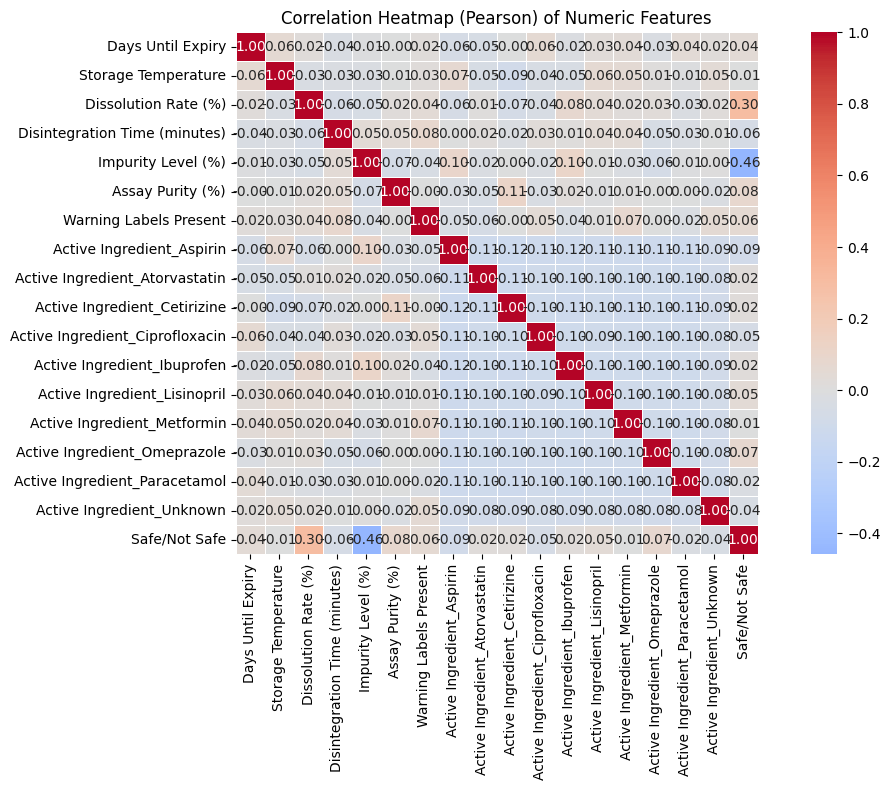

In [21]:

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap (Pearson) of Numeric Features')
plt.tight_layout()
plt.show()

first taking all the columns and train and test implementation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [23]:
X = df.drop('Safe/Not Safe', axis=1)
y = df['Safe/Not Safe']


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


=== Logistic Regression ===
Accuracy: 0.6058823529411764
Precision: 0.5774647887323944
Recall: 0.5256410256410257
F1 Score: 0.5503355704697986
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65        92
           1       0.58      0.53      0.55        78

    accuracy                           0.61       170
   macro avg       0.60      0.60      0.60       170
weighted avg       0.60      0.61      0.60       170



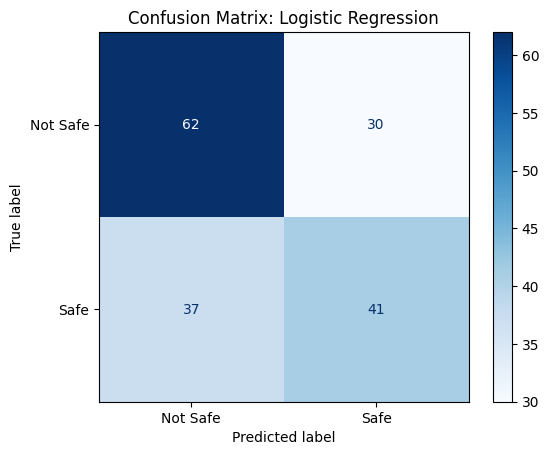


=== SVM ===
Accuracy: 0.8823529411764706
Precision: 0.8536585365853658
Recall: 0.8974358974358975
F1 Score: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        92
           1       0.85      0.90      0.88        78

    accuracy                           0.88       170
   macro avg       0.88      0.88      0.88       170
weighted avg       0.88      0.88      0.88       170



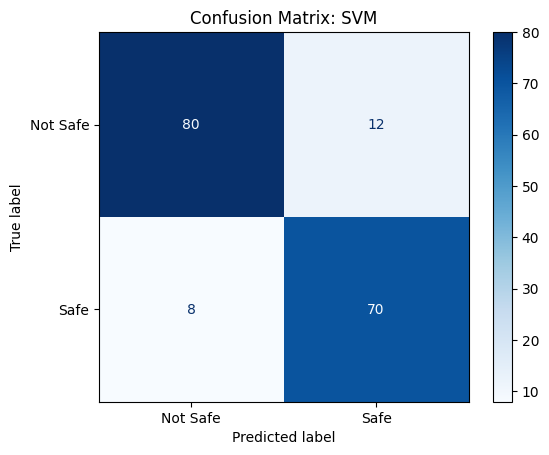


=== Random Forest ===
Accuracy: 0.9764705882352941
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



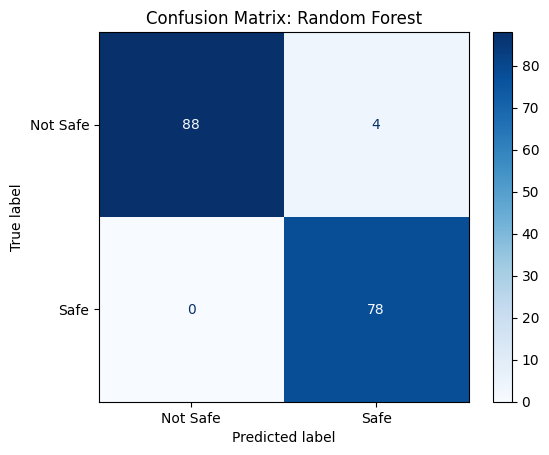


=== XGBoost ===
Accuracy: 0.9764705882352941
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



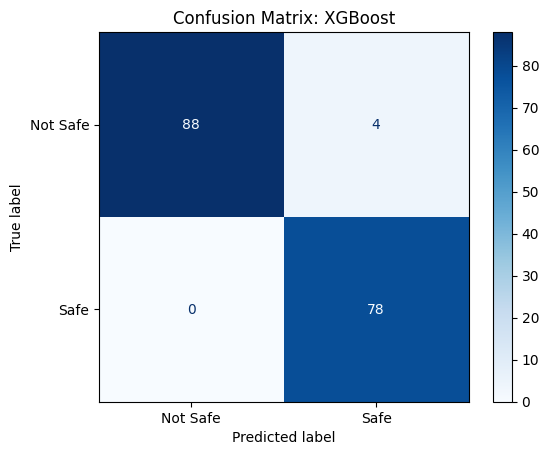


=== CatBoost ===
Accuracy: 0.9764705882352941
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



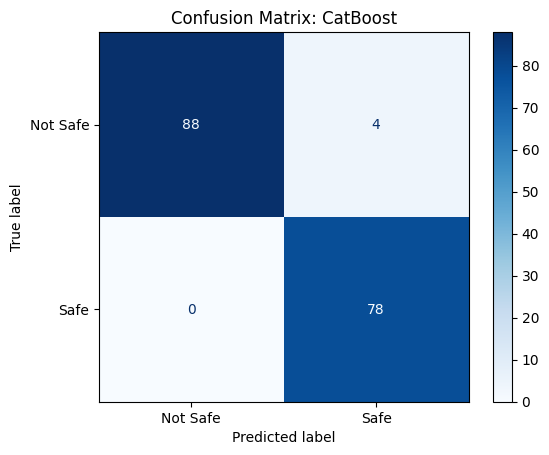

[LightGBM] [Info] Number of positive: 293, number of negative: 384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1371
[LightGBM] [Info] Number of data points in the train set: 677, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432792 -> initscore=-0.270470
[LightGBM] [Info] Start training from score -0.270470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

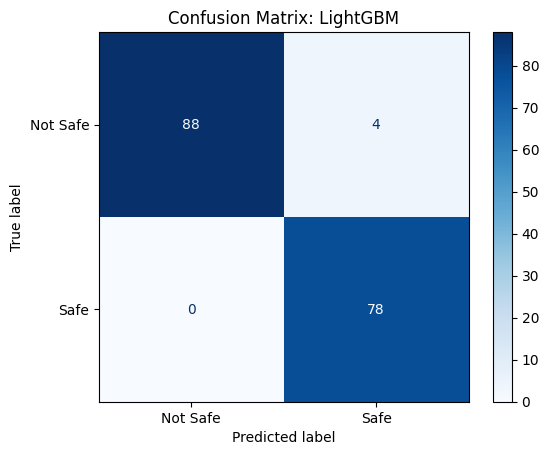


=== AdaBoost ===
Accuracy: 0.9764705882352941
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



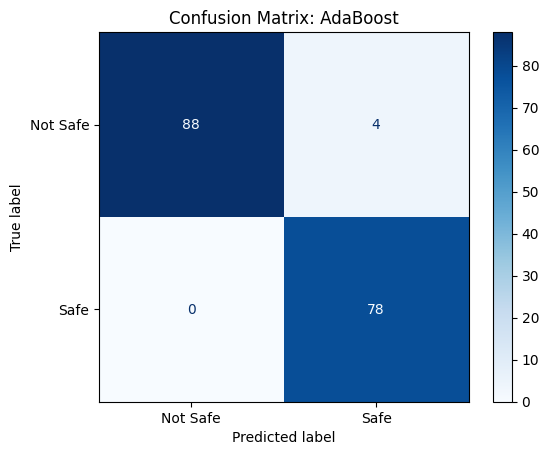


=== Gradient Boosting ===
Accuracy: 0.9764705882352941
Precision: 0.9512195121951219
Recall: 1.0
F1 Score: 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170



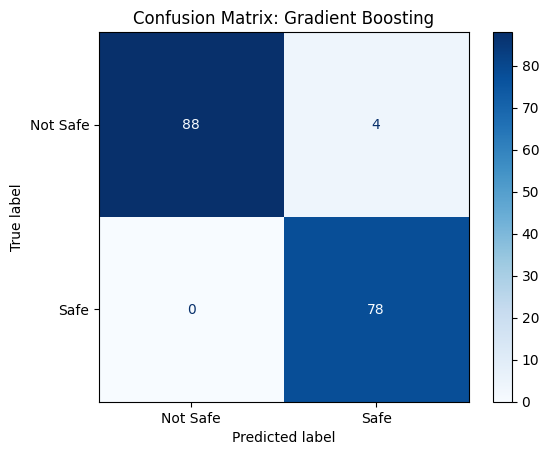


=== Naive Bayes ===
Accuracy: 0.7823529411764706
Precision: 0.8253968253968254
Recall: 0.6666666666666666
F1 Score: 0.7375886524822695
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        92
           1       0.83      0.67      0.74        78

    accuracy                           0.78       170
   macro avg       0.79      0.77      0.78       170
weighted avg       0.79      0.78      0.78       170



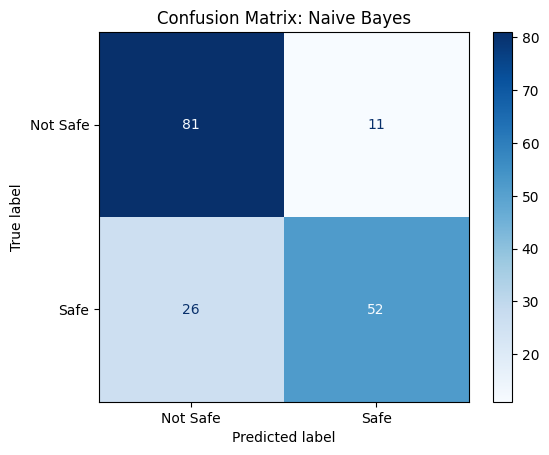

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Safe", "Safe"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.grid(False)
    plt.show()


In [26]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import numpy as np

class HybridCatBoostNB(BaseEstimator, ClassifierMixin):
    def __init__(self, catboost_weight=0.5, cat_params=None):
        self.catboost_weight = catboost_weight
        self.cat_params = cat_params if cat_params else {'verbose': 0}
        self.cat_model = CatBoostClassifier(**self.cat_params)
        self.nb_model = GaussianNB()

    def fit(self, X, y):
        print("Training CatBoost model...")
        self.cat_model.fit(X, y)
        print("Training Naive Bayes model...")
        self.nb_model.fit(X, y)
        return self

    def predict_proba(self, X):
        cat_proba = self.cat_model.predict_proba(X)
        nb_proba = self.nb_model.predict_proba(X)
        return self.catboost_weight * cat_proba + (1 - self.catboost_weight) * nb_proba

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

    def get_feature_importance(self):

        return self.cat_model.get_feature_importance()



In [27]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# X, y = ... # Your dataset, already preprocessed

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the hybrid model
hybrid_model = HybridCatBoostNB(catboost_weight=0.7)  # More weight to CatBoost
hybrid_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = hybrid_model.predict(X_test)
y_proba = hybrid_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Training CatBoost model...
Training Naive Bayes model...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

ROC AUC Score: 0.9726867335562988


In [28]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import numpy as np

class HybridGBSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, gb_weight=0.5, gb_params=None, svm_params=None):
        self.gb_weight = gb_weight
        self.gb_params = gb_params if gb_params else {}
        self.svm_params = svm_params if svm_params else {'probability': True}
        self.gb_model = GradientBoostingClassifier(**self.gb_params)
        self.svm_model = SVC(**self.svm_params)

    def fit(self, X, y):
        print("Training Gradient Boosting model...")
        self.gb_model.fit(X, y)
        print("Training SVM model...")
        self.svm_model.fit(X, y)
        return self

    def predict_proba(self, X):
        gb_proba = self.gb_model.predict_proba(X)
        svm_proba = self.svm_model.predict_proba(X)
        return self.gb_weight * gb_proba + (1 - self.gb_weight) * svm_proba

    def predict(self, X):
        combined_proba = self.predict_proba(X)
        return np.argmax(combined_proba, axis=1)

    def get_feature_importance(self):
        # Only Gradient Boosting provides feature importance
        return self.gb_model.feature_importances_


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming X, y are your preprocessed features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train hybrid model
hybrid_model = HybridGBSVM(gb_weight=0.6)
hybrid_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = hybrid_model.predict(X_test_scaled)
y_proba = hybrid_model.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Training Gradient Boosting model...
Training SVM model...
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.95      1.00      0.97        78

    accuracy                           0.98       170
   macro avg       0.98      0.98      0.98       170
weighted avg       0.98      0.98      0.98       170

ROC AUC Score: 0.9768673355629878


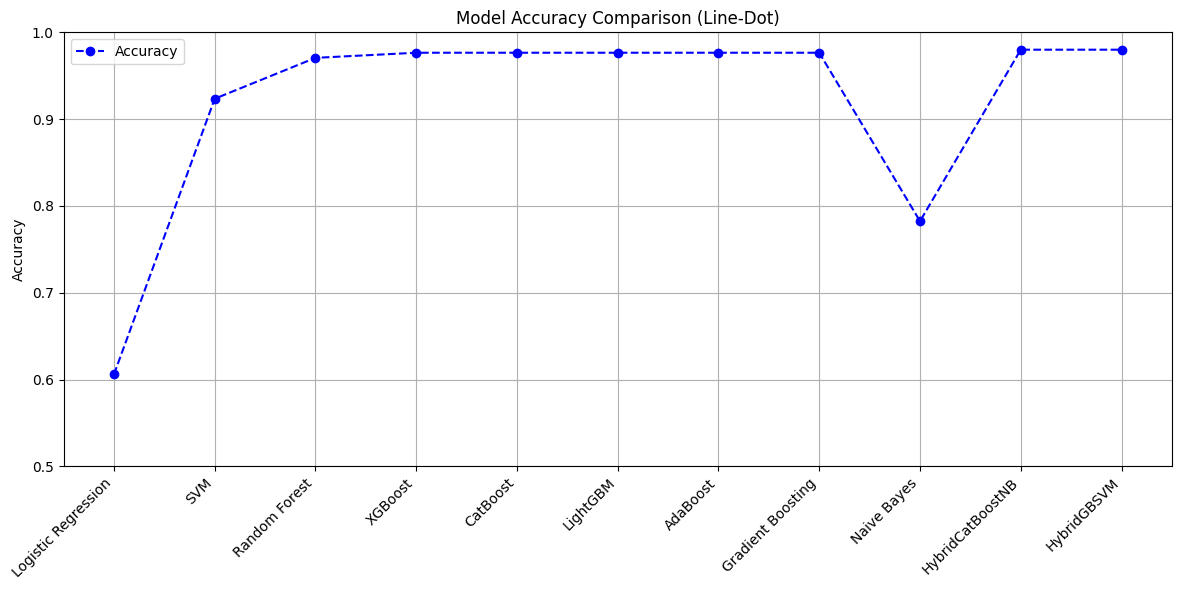

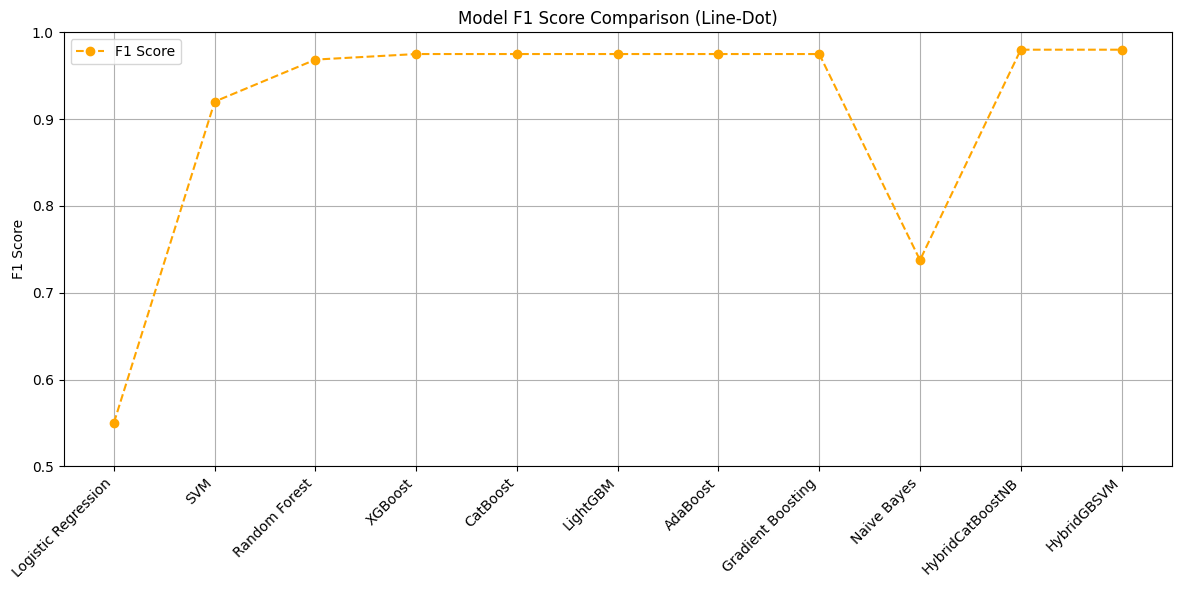

In [34]:
import matplotlib.pyplot as plt

model_names = [
    "Logistic Regression", "SVM", "Random Forest", "XGBoost", "CatBoost", "LightGBM",
    "AdaBoost", "Gradient Boosting", "Naive Bayes",
    "HybridCatBoostNB", "HybridGBSVM"
]

accuracies = [
    0.6059, 0.9235, 0.9706, 0.9765, 0.9765, 0.9765,
    0.9765, 0.9765, 0.7824, 0.98, 0.98
]

f1_scores = [
    0.5503, 0.9202, 0.9686, 0.9750, 0.9750, 0.9750,
    0.9750, 0.9750, 0.7376, 0.98, 0.98
]

plt.figure(figsize=(12, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='--', color='blue', label='Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Line-Dot)")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(model_names, f1_scores, marker='o', linestyle='--', color='orange', label='F1 Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel("F1 Score")
plt.title("Model F1 Score Comparison (Line-Dot)")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [35]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Cross-validation accuracies: [0.98235294 0.98235294 0.9704142  0.96449704 0.96449704]
Mean Accuracy: 0.972822833275322
Standard Deviation: 0.008075704821271023


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:04:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


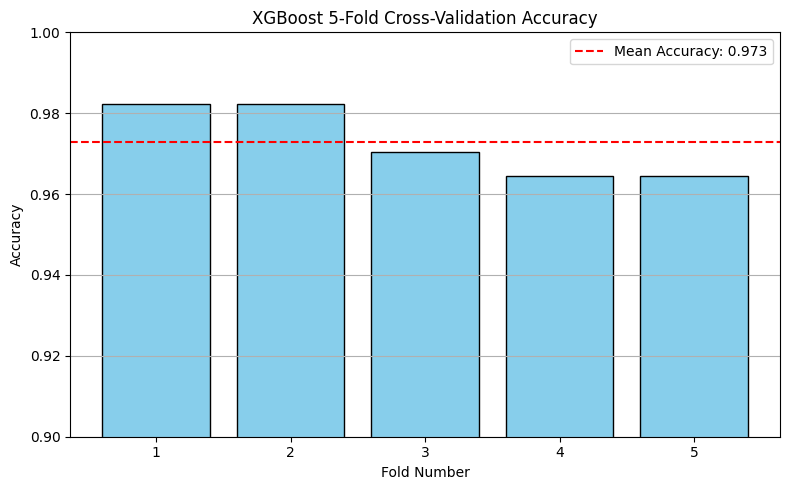

In [32]:
import matplotlib.pyplot as plt


scores = [0.98235294, 0.98235294, 0.9704142, 0.96449704, 0.96449704]
mean_score = np.mean(scores)


plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), scores, color='skyblue', edgecolor='black')
plt.axhline(y=mean_score, color='red', linestyle='--', label=f'Mean Accuracy: {mean_score:.3f}')

plt.title('XGBoost 5-Fold Cross-Validation Accuracy')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
